# Reading Between the Lines: Deciphering IMDB Movie Reviews

For this challenge, we will perform sentiment analysis on the IMDb dataset of 50k movie reviews. Sentiment analysis, also known as opinion mining, uses natural language processing (NLP), text analysis, and computational linguistics to identify and extract subjective information from source materials.

## Here's an overview of the analytical process:

Data Loading and Preprocessing: The first step in text analysis involves loading the dataset into a suitable data structure. The IMDb dataset typically consists of movie reviews (text data) and their corresponding sentiment labels (positive or negative). After the data is loaded, preprocessing steps such as normalization, tokenization, stemming/lemmatization, stop-word removal, and others are applied to clean the data and prepare it for further analysis.

**Feature Extraction:** Once the data is cleaned, we convert the text data into numerical features that can be used as inputs to machine learning algorithms. Techniques like Bag of Words, TF-IDF, or more advanced methods like word embeddings (Word2Vec, GloVe) or transformers can be used at this step.

**Model Building:** After feature extraction, we build a machine learning or deep learning model that can classify movie reviews as positive or negative based on the input features. Models commonly used for text-based classification include Naive Bayes, SVM, Random Forests, Logistic Regression, Neural Networks, or even more complex models such as Transformer-based.

**Model Training:** Once the model architecture is defined, it is trained using the features from the movie reviews and their corresponding sentiment labels. The trained model can be evaluated on a separate test set to determine how well it generalizes to unseen data. Evaluation metrics commonly used include accuracy, precision, recall, F1-score, and/or AUC-ROC.

**Optimization and Tuning:** Depending on the evaluation results, the model might be further optimized or tuned by optimizing parameters, changing the model architecture, or using different feature extraction techniques. This process might be repeated until satisfactory results are achieved.
These are the steps we will take to analyze IMDb movie reviews. 

Let's begin by loading the necessary tools.

In [20]:
import pandas as pd # for working with data loaded as data-frame
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import re # re regular expressions module, we will use it for text cleaning tasks such as removing  punctuation, etc..
import nltk # Natural Language Toolkit

#nltk.download('punkt') # for tokenization
#nltk.download('stopwords')
#nltk.download('wordnet')

from matplotlib import style
style.use('ggplot')

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV


## Part 1: data exploration and cleaning;

The first step involves loading the IMDb dataset, which consists of movie reviews (text data) and their corresponding sentiment labels (positive or negative), into a suitable data structure. After the data is loaded, it is crucial to inspect what the data has to offer. This helps us determine the necessary preprocessing steps to clean the data and prepare it for further analysis,

In [43]:
imdb_data=pd.read_csv('/Users/.../IMDB_Dataset.csv') # load the IMDB dataset

In [44]:
imdb_data.head(10) # after loading it is a good ideat to look at e.g. 10 top entries or so

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


Following the loading of our dataset, we can employ the *info()* function from pandas to generate a concise summary of our DataFrame. This function reveals vital information about the dataset including the total number of rows and columns, the count of non-null values in each column, the data types in each column, and the memory usage of the DataFrame. Understanding these details is crucial as they guide subsequent steps in the data cleaning and preprocessing stages

In [23]:
imdb_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
review       50000 non-null object
sentiment    50000 non-null object
dtypes: object(2)
memory usage: 781.4+ KB


Since our data frame contains non-numerical data, *describe()* comand can provide us useful statistics,such as:

**count** - Number of non-null (or non-NA) observations.

**unique** -  Number of distinct values.

**top** - Most frequent value.

**freq** - Frequency of the most frequent value.

Thus by using describe(include='all') will provide us statistical summaries for both numerical and non-numerical columns as is evident in cell given below:

In [24]:
imdb_data.describe(include='all')

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,negative
freq,5,25000


Upon analyzing the IMDb movie reviews dataset, we've identified 49,582 unique entries out of a total of 50,000. Consequently, our next step involves locating and eliminating any duplicate entries. We can accomplish this using the *drop_duplicates()* function provided by pandas. This function considers all columns by default and removes all rows that are identical across these columns, leaving only the first occurrence. The command that implements this is as follows,

In [25]:
imdb_data = imdb_data.drop_duplicates()

To ensure we have successfully retained only unique entries for subsequent analysis, we can verify the total number of rows remaining in our dataset,

In [26]:
imdb_data.shape[0]

49582

To check if our IMDb dataset is balanced with respect to the sentiment, we can use the *value_counts()* function available in pandas. This function counts the number of occurrences of each unique value in a single column of our data-frame, in this case, the 'sentiment' column.

**Note:** A perfectly balanced dataset would have exactly the same number of positive and negative reviews. However, in practice, a slight imbalance is typically not a problem. But, if there is a large imbalance, we might need to consider using attitional techniques such as upsampling the minority class, downsampling the majority class to deal with this issue. This is important for many machine learning algorithms, as a serious imbalance can make the algorithm biased towards the majority class, thereby affecting the performance of the model.

To check this in our current dataset, we type,

In [27]:
imdb_data['sentiment'].value_counts()

positive    24884
negative    24698
Name: sentiment, dtype: int64

The difference between the number of positive and negative reviews is relatively small (186 reviews), this indicates that our dataset is "roughly" balanced (i.e. we have approximately the same number of 'positive' and 'negative' instances).

 Given that the class distribution in our case is almost equal, we should be able to proceed with model building without having to worry about handling class imbalance. It is a good practice to always check the class distribution before starting the model building process!

We can also visualise this by plotting the respective counts of positive and negative sentiments:

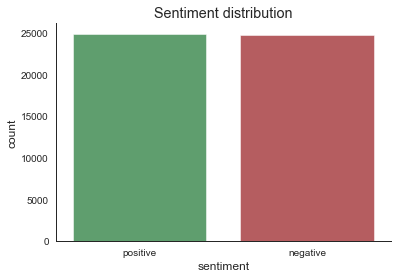

In [28]:
sns.set_style("white") # no background colour
deep_colors = sns.color_palette("deep") # we will use colours from deep palette
custom_palette =[deep_colors[2], deep_colors[3]] # pre-select red and green from deep palette 
sns.countplot(x='sentiment', data=imdb_data, palette = custom_palette)
plt.title("Sentiment distribution") # add title to plot
sns.despine() # to remove the top and right borders of the plot.
plt.savefig('/Users/zurauskj/Desktop/FellowshipAI/Analysis_Plots/sentiment_distribution.png')

Let us look at a single review before applying text cleaning procedures,

In [10]:
print(imdb_data.iloc[8]['review'])

Encouraged by the positive comments about this film on here I was looking forward to watching this film. Bad mistake. I've seen 950+ films and this is truly one of the worst of them - it's awful in almost every way: editing, pacing, storyline, 'acting,' soundtrack (the film's only song - a lame country tune - is played no less than four times). The film looks cheap and nasty and is boring in the extreme. Rarely have I been so happy to see the end credits of a film. <br /><br />The only thing that prevents me giving this a 1-score is Harvey Keitel - while this is far from his best performance he at least seems to be making a bit of an effort. One for Keitel obsessives only.


We can now clean/normalise text-based data using combination of string methods and regular expressions (from the re module). For simplicity, we define a single function to carry out the task and apply it on our data-frame:

In [11]:
def clean_text(text):
    
    text = text.lower() # Convert text to lowercase
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) # Remove URLs
    
    return text

imdb_data['review'] = imdb_data['review'].apply(clean_text)

To convince ourselves that the text was processed as desired we re-examin the same entry by printing the review,

In [12]:
print(imdb_data.iloc[8]['review'])
#imdb_data.head(10)

encouraged by the positive comments about this film on here i was looking forward to watching this film bad mistake ive seen 950 films and this is truly one of the worst of them  its awful in almost every way editing pacing storyline acting soundtrack the films only song  a lame country tune  is played no less than four times the film looks cheap and nasty and is boring in the extreme rarely have i been so happy to see the end credits of a film the only thing that prevents me giving this a 1score is harvey keitel  while this is far from his best performance he at least seems to be making a bit of an effort one for keitel obsessives only


The next good step after cleaning text data is to tokenize it. This process involves breaking down the text into individual words/tokens. Tokenization is important because it breaks text into meaningful units (tokens), which is easier for the machine learning models to understand and process. We can achieve this by using *nltk* command *word_tokenize*,

In [13]:
imdb_data['review'] = imdb_data['review'].apply(word_tokenize)

Let us check how it worked out on same review,

In [14]:
print(imdb_data.iloc[8]['review'])

['encouraged', 'by', 'the', 'positive', 'comments', 'about', 'this', 'film', 'on', 'here', 'i', 'was', 'looking', 'forward', 'to', 'watching', 'this', 'film', 'bad', 'mistake', 'ive', 'seen', '950', 'films', 'and', 'this', 'is', 'truly', 'one', 'of', 'the', 'worst', 'of', 'them', 'its', 'awful', 'in', 'almost', 'every', 'way', 'editing', 'pacing', 'storyline', 'acting', 'soundtrack', 'the', 'films', 'only', 'song', 'a', 'lame', 'country', 'tune', 'is', 'played', 'no', 'less', 'than', 'four', 'times', 'the', 'film', 'looks', 'cheap', 'and', 'nasty', 'and', 'is', 'boring', 'in', 'the', 'extreme', 'rarely', 'have', 'i', 'been', 'so', 'happy', 'to', 'see', 'the', 'end', 'credits', 'of', 'a', 'film', 'the', 'only', 'thing', 'that', 'prevents', 'me', 'giving', 'this', 'a', '1score', 'is', 'harvey', 'keitel', 'while', 'this', 'is', 'far', 'from', 'his', 'best', 'performance', 'he', 'at', 'least', 'seems', 'to', 'be', 'making', 'a', 'bit', 'of', 'an', 'effort', 'one', 'for', 'keitel', 'obsessi

Next, we will perform stopwords removal. Stopwords are common words like 'is', 'the', 'and', etc.; it is a good idea to remove them as they do not carry much meaningful information for the context (thus for the model too). We remove them using *nltk*'s list of English stopwords,

In [15]:
def remove_stopwords(tokens):
    filtered_text = [word for word in tokens if word not in stop_words]
    return filtered_text

imdb_data['review'] = imdb_data['review'].apply(remove_stopwords) # Apply the function to the 'review' column

Let us check how it worked out on same review,

In [16]:
print(imdb_data.iloc[8]['review'])

['encouraged', 'positive', 'comments', 'film', 'looking', 'forward', 'watching', 'film', 'bad', 'mistake', 'ive', 'seen', '950', 'films', 'truly', 'one', 'worst', 'awful', 'almost', 'every', 'way', 'editing', 'pacing', 'storyline', 'acting', 'soundtrack', 'films', 'song', 'lame', 'country', 'tune', 'played', 'less', 'four', 'times', 'film', 'looks', 'cheap', 'nasty', 'boring', 'extreme', 'rarely', 'happy', 'see', 'end', 'credits', 'film', 'thing', 'prevents', 'giving', '1score', 'harvey', 'keitel', 'far', 'best', 'performance', 'least', 'seems', 'making', 'bit', 'effort', 'one', 'keitel', 'obsessives']


The next step would be stemming/lemmatization; we will choose between these based on what it does, thus,

**Stemming:** usually refers to a crude heuristic process that chops off the ends of words. Stemmers use language-specific rules, but they often have no understanding of the context, and thus cannot handle irregular cases correctly. For example, the stemmer might not be able to correctly stem the word "better" to "good", and would simply remove the "er" to get "bett".

**Lemmatization:** takes into consideration the morphological analysis of the words. To do so, it is necessary to have detailed dictionaries which the algorithm can look through to link the form back to its lemma. For example, "better" should be correctly lemmatized to "good".

In summary, stemming is considered faster as it simply trims off the end of the word, while lemmatization is slower but more accurate as it needs to look up the lemma in a dictionary. For this dataset, lemmatization is better choice, as we favour acuracy over speed. Thus,

In [17]:
def lemmatize_text(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

imdb_data['review'] = imdb_data['review'].apply(lemmatize_text) # Apply the function to the 'review' column

Again, let us check how it worked using same review,

In [18]:
print(imdb_data.iloc[8]['review'])

encouraged positive comment film looking forward watching film bad mistake ive seen 950 film truly one worst awful almost every way editing pacing storyline acting soundtrack film song lame country tune played le four time film look cheap nasty boring extreme rarely happy see end credit film thing prevents giving 1score harvey keitel far best performance least seems making bit effort one keitel obsessive


## Part 2: Feature extraction;

Now that we have processed IMDb data, it is time to convert text data into a numerical format that can serve later as an input into a machine learning model.

We will be using TF-IDF Vectorization to transform lemmatized tokens into a numerical format. TF-IDF approach stands for Term Frequency-Inverse Document Frequency, a measure that reflects how important a word is to a review ("document") in the context of the whole reviews. Words that are frequent in a specific review but rare across all reviews are given more weight, while words that are frequent in many reviews are down-weighted.
In such way transformed data can then be used as input for machine learning algorithms to perform sentiment analysis, identifying whether each review is positive or negative. Alternative approaches to TF-IDF include, e.g. Bag of Words (BoW) - that represents text data as a matrix of token counts. It counts how many times each word appears in a document; or more advanced approaches exist such as Word2Vec - that involves training a neural network model.

In [19]:
vectorizer = TfidfVectorizer() #initialize a TfidfVectorizer object
X = vectorizer.fit_transform(imdb_data['review'])   # we transform lemmatized reviews into TF-IDF vectors
print(X.shape) # check underlying matrix size

(49582, 210509)


Here, *X* represents a matrix where each row corresponds to a movie review and each column corresponds to a word. The value at the *i*-th row and the *j*-th column contains TF-IDF score of the *j*-th word in the *i*-th review.

The TF-IDF score is calculated by mutiplying to scores: TF-IDF(word) = TF(word) * IDF(word), where

Term Frequency (TF) -  measures the frequency of a word in a review by calculating the number of times a word appears in the review divided by the total number of words in the same review.

Inverse Document Frequency (IDF) -  measures the significance of the word in the whole corpus, which is calculated as the logarithm of the total number of reviews in the dataset divided by the number of reviews containing the word.

Higher TF-IDF scores signifies that the word is more important in the document, but it also considers the word's frequency in all reviews. Thus, common words that appear in many reviews will have a lower IDF score and in turn lower TF-IDF score. This helps to balance out the term frequency and not give too much weight to words that appear too frequently. In the context of sentiment analysis, this means words that are more specific and relevant to sentiment ('good', 'amazing', 'dislike', 'terrible', etc.) will be given higher weight.

## Part 3: Sentiment classification;

Here we will be performing sentiment classification using Random Forest model. It is a popular choice for text classification tasks, and can work well with high dimensional data like TF-IDF vectors above (recall *X*'s shape above). Briefly, Random Forest(RF) is a type of ensemble machine learning algorithm that is built on decision trees. Ensemble methods, as the name suggests, combine multiple machine learning models to create more powerful models. In the case of RF, the model creates a number of decision trees at training time and outputs the class that is the mode of the classes of the individual trees. For this we will be using RF implementation within *scikit-learn*.

We begin by splitting initial data into train and test sets at ratio 80% : 20%, 

In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, imdb_data['sentiment'], test_size=0.2, random_state=42)
print("size of training set is ", X_train.shape[0],"examples, which is", round(X_train.shape[0]*100/X.shape[0]),"%")
print("size of tresting set is ", X_test.shape[0],"examples, which is", round(X_test.shape[0]*100/X.shape[0]),"%")

size of training set is  39665 examples, which is 80 %
size of tresting set is  9917 examples, which is 20 %


The code below will initialize a Random Forest model and fit the model using the training data. Then, it will use trained model to make predictions on the test-set and to print a standard classification report, which includes metrics like precision, recall, and F1-score.

In [39]:
clf = RandomForestClassifier(n_estimators=100, random_state=42) # Initialize the Random Forest model
clf.fit(X_train, y_train) #  Train the model
y_pred = clf.predict(X_test)# Make predictions on the test set
print(classification_report(y_test, y_pred)) # Evaluate the model

              precision    recall  f1-score   support

    negative       0.85      0.84      0.84      4939
    positive       0.84      0.85      0.85      4978

    accuracy                           0.84      9917
   macro avg       0.84      0.84      0.84      9917
weighted avg       0.84      0.84      0.84      9917



From the provided classification report, we can see that model has relatively high performance across all metrics. These results indicate that this model has achieved comparable performance in identifying both positive and negative reviews, with an overall accuracy of 84%. Given that the dataset is almost perfectly balanced (as evidenced by the support), this level of performance suggests a robust model.

To seek better perormance, we can explore hyperparameter tuning, which is the process of searching for the optimal hyperparameters for a machine learning algorithm, such as our RF model. The process typically involves specifying a hyperparameter space and a method to search or sample candidates; then the algorithm is trained and validated against a holdout set for each hyperparameter combination.

*Scikit-learn* provides several methods for hyperparameter tuning. Below, hyperparameter tuning for a random forest classifier is achieved using GridSearchCV approach,

In [41]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40],
    ;
}

# Create a base model
rf = RandomForestClassifier()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Create a new random forest classifier with the best parameters
rf_best = RandomForestClassifier(**best_params)

# Fit and predict
rf_best.fit(X_train, y_train)
predictions = rf_best.predict(X_test)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [42]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

    negative       0.88      0.85      0.86      4939
    positive       0.85      0.88      0.87      4978

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917



To conclude, here we have successfully built a text classification model using a Random Forest classifier to predict the sentiment of movie reviews from the IMDb dataset. The preprocessing steps involved cleaning, normalizing the text, tokenization, and vectorization using TF-IDF approach.

Initially, the model achieved an accuracy of 84% with precision, recall, and F1-score also around 84% for both classes, showing a balanced performance. This indicates that our model was already performing reasonably well at distinguishing between positive and negative reviews.

To further improve the model's performance, the hyperparameter tuning using GridSearchCV was performed, which allowed to systematically work through multiple combinations of parameters, cross-validating as it goes to determine which parameters give the best performance.

As a result, the accuracy improved to 86%, and we also saw improvement in precision, recall, and F1-score for both classes. The optimized model shows a balanced performance between both classes, making it a robust model for this task.

This demonstrates the power of machine learning for tasks like sentiment analysis and the importance of preprocessing in dealing with natural language analysis. 

Finally, it is important to note, that sentiment analysis (as given above) is crucial for a number of reasons; e.g. In audience Segmentation, sentiment analysis can help identify different audience segments and their preferences; whereas in context of social research, such analysis can provide insights into societal norms and more.